In [ ]:
!pip install tensorflow gradio matplotlib seaborn pillow scikit-learn


In [ ]:
import zipfile
import os

zip_path = '/content/archive.zip'  # your uploaded file
extract_path = '/content/modified-dataset'  # destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check contents
os.listdir(extract_path)



['train', 'val', 'test', 'modified-dataset']

In [ ]:
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Input
from tensorflow.keras.models import Model

# Number of classes
num_classes = train_data.num_classes

# Load base model
base_model = EfficientNetV2B0(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

# Freeze base model layers
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


75/75 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6215 - loss: 1.2483 - val_accuracy: 0.9667 - val_loss: 0.1528
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9210 - loss: 0.2541 - val_accuracy: 0.9733 - val_loss: 0.1241
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9377 - loss: 0.2050 - val_accuracy: 0.9700 - val_loss: 0.1277
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9443 - loss: 0.1894 - val_accuracy: 0.9767 - val_loss: 0.1065
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.9466 - loss: 0.1613 - val_accuracy: 0.9733 - val_loss: 0.1173
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9615 - loss: 0.1376 - val_accuracy: 0.9733 - val_loss: 0.1192
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9535 - loss: 0.1455 - val_accuracy: 0.9667 - val_loss: 0.1233


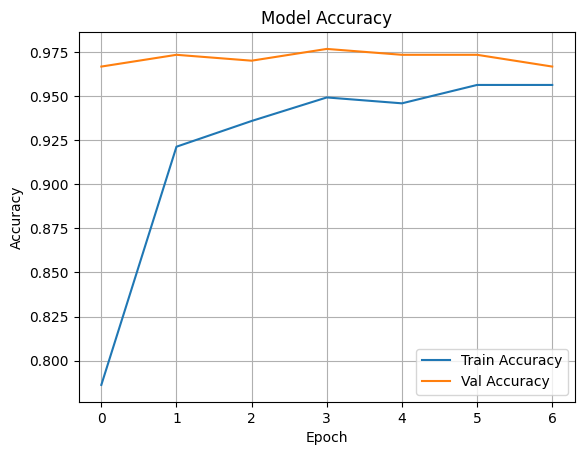

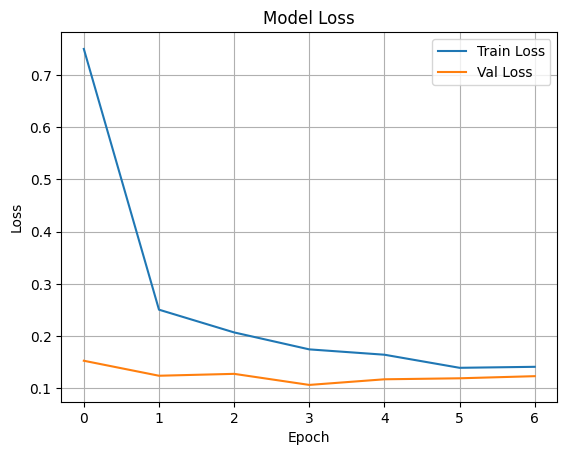

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 916ms/step - accuracy: 0.9726 - loss: 0.1470
Test Accuracy: 0.9667
Test Loss: 0.1293


In [ ]:
model.save('e_waste_classifier.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)


 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 983ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Classification Report:

                 precision    recall  f1-score   support

        Battery       1.00      0.97      0.98        30
       Keyboard       1.00      1.00      1.00        30
      Microwave       0.91      0.97      0.94        30
         Mobile       1.00      0.97      0.98        30
          Mouse       0.91      1.00      0.95        30
            PCB       1.00      0.97      0.98        30
         Player       1.00      0.93      0.97        30
        Printer       1.00      0.97      0.98        30
     Television       0.90      0.93      0.92        30
Washing Machine       0.97      0.97      0.97        30

       accuracy                           0.97       300
      macro avg       0.97      0.97      0.97       300
   weighted avg       0.97      0.97      0.97       300



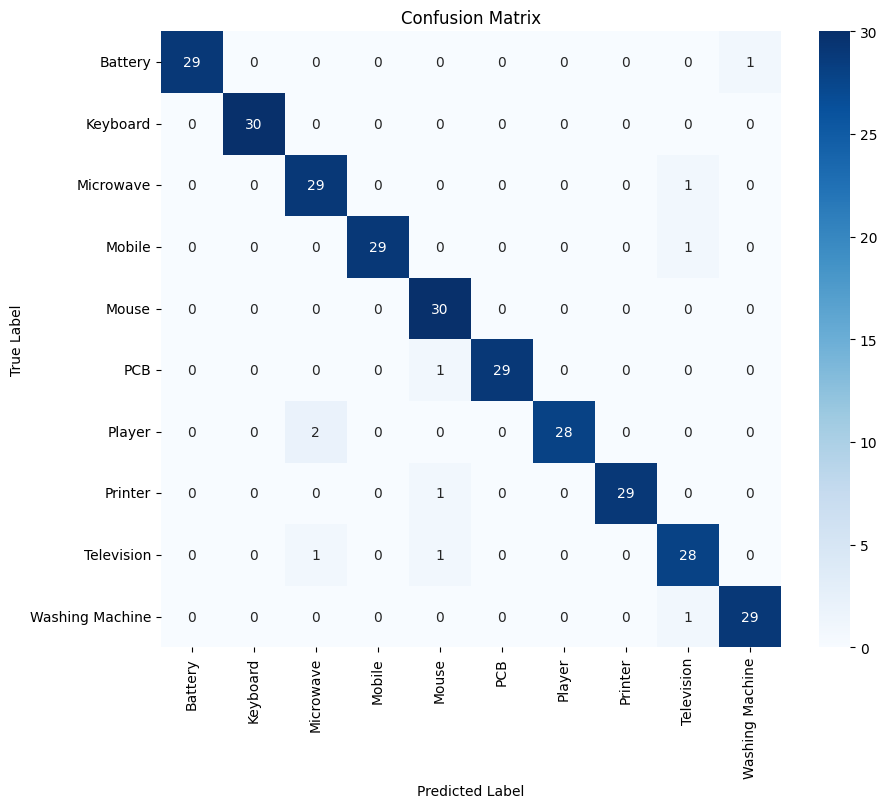

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)  # predicted class indices
y_true = test_data.classes  # true class indices
class_labels = list(test_data.class_indices.keys())  # class names

# Print classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [ ]:
import gradio as gr
from PIL import Image
import numpy as np


In [ ]:
# Use same class labels as your dataset
class_labels = list(test_data.class_indices.keys())

def classify_image(img: Image.Image):
    # Resize to model input size
    img = img.resize((224, 224))

    # Convert to array and preprocess
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

    # Predict
    predictions = model.predict(img_array)[0]

    # Map predictions to class labels
    return {class_labels[i]: float(predictions[i]) for i in range(len(class_labels))}


In [ ]:
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title="E-Waste Image Classifier",
    description="Upload an image of an electronic item to classify it into 1 of 10 e-waste categories."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c9a0b3b5511f871a5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
model.save('e_waste_classifier.keras')
